Project Overview
Goal: Train a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into 10 categories.
Tech Stack: Python, TensorFlow/Keras, Matplotlib, NumPy.
Dataset: CIFAR-10 (included in TensorFlow/Keras datasets).



 Install Required Libraries

In [1]:
pip install tensorflow numpy matplotlib


Import Libraries and Load Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names for visualization
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Visualize the Dataset

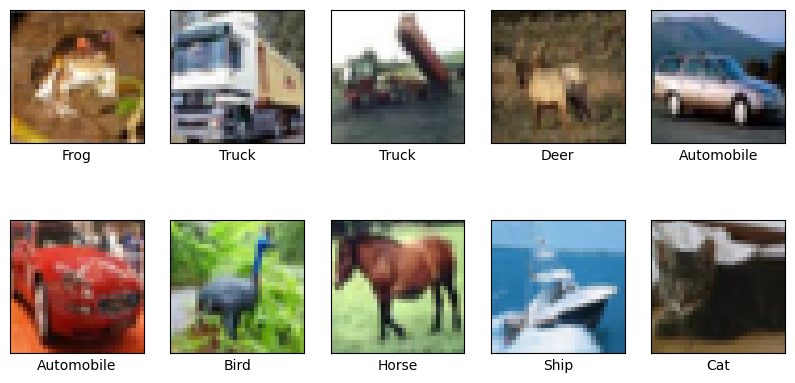

In [3]:
# Display 10 sample images with their labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


Visualize the Dataset

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the Model

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.3039 - loss: 1.8623 - val_accuracy: 0.5557 - val_loss: 1.2414
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.5350 - loss: 1.3027 - val_accuracy: 0.6278 - val_loss: 1.0871
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.6105 - loss: 1.1071 - val_accuracy: 0.6497 - val_loss: 0.9955
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.6533 - loss: 0.9895 - val_accuracy: 0.6833 - val_loss: 0.9195
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.6856 - loss: 0.9082 - val_accuracy: 0.6872 - val_loss: 0.9017
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.7053 - loss: 0.8459 - val_accuracy: 0.7068 - val_loss: 0.8484
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7283 - loss: 0.7854 - val_accuracy: 0.7137 - val_loss: 0.8367
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7397 -

Evaluate the Model

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 5s - 16ms/step - accuracy: 0.7202 - loss: 0.8360
Test Accuracy: 72.02%


Visualize Training Performance

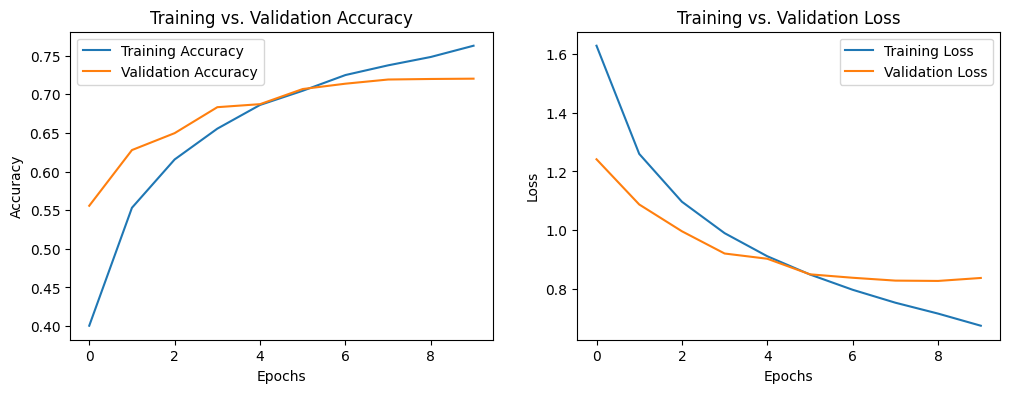

In [8]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()


Test with New Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


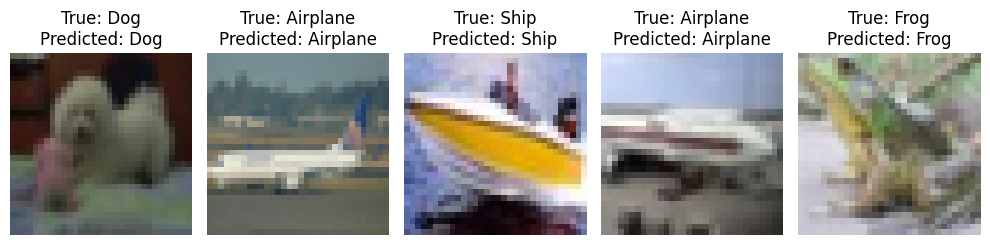

In [9]:
# Select a few random test images
num_test_samples = 5
indices = np.random.choice(len(x_test), num_test_samples, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, num_test_samples, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx][0]]}\nPredicted: {class_names[np.argmax(model.predict(x_test[idx:idx+1]))]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Save and Load the Model

In [11]:
model.save('my_model.keras')

# To load the model later
# model = tf.keras.models.load_model('cifar10_cnn_model.h5')
